# IMPORTS

In [296]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import TopKCategoricalAccuracy

from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# tf.config.optimizer.set_jit(True)

# Data read and corrections

## READ

In [297]:
data = pd.read_csv("Data\Students_Grading_Dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\dadmo\AppData\Local\Temp\ipykernel_12496\3745072225.py:1: SyntaxWarning: invalid escape sequence '\S'
  data = pd.read_csv("Data\Students_Grading_Dataset.csv")


## CHOOSE WHICH COLUMNS USE

In [298]:
data.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

In [299]:
# data = data[["Student_ID", "Gender", "Age", "Department", "Final_Score", "Total_Score", "Study_Hours_per_Week", "Extracurricular_Activities", "Internet_Access_at_Home", "Stress_Level (1-10)", "Sleep_Hours_per_Night"]]
# data = data[["Gender", "Age", "Department", "Final_Score", "Total_Score", "Study_Hours_per_Week", "Extracurricular_Activities", "Internet_Access_at_Home", "Stress_Level (1-10)", "Sleep_Hours_per_Night"]]
data = data.drop(columns=["Student_ID", "First_Name", "Last_Name", "Email", "Parent_Education_Level", "Family_Income_Level", "Grade"])

In [300]:
data

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Stress_Level (1-10),Sleep_Hours_per_Night
0,Female,22,Mathematics,97.36,40.61,59.61,73.69,53.17,7.34,62.84,83.49,10.3,Yes,No,1,5.9
1,Male,18,Business,97.71,57.27,74.00,74.23,98.23,8.80,98.23,92.29,27.1,No,No,4,4.3
2,Male,24,Engineering,99.52,41.84,63.85,85.85,50.00,0.47,91.22,93.55,12.4,Yes,No,9,6.1
3,Female,24,Engineering,90.38,45.65,44.44,68.10,66.27,0.42,55.48,51.03,25.5,No,Yes,8,4.9
4,Female,23,CS,59.41,53.13,61.77,67.66,83.98,6.43,87.43,90.91,13.3,Yes,No,6,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Male,19,CS,96.09,45.86,45.63,74.13,81.53,0.98,51.66,83.60,7.8,No,No,10,4.5
4996,Male,19,Mathematics,96.30,78.67,47.42,57.89,85.96,4.78,52.33,50.60,24.2,No,Yes,4,7.2
4997,Female,24,CS,89.94,50.84,65.83,84.69,82.27,0.75,97.89,90.32,7.6,No,Yes,5,6.6
4998,Male,23,Engineering,99.09,55.44,57.45,78.78,55.96,6.29,84.74,77.35,14.5,Yes,No,10,5.9


In [301]:
# raise BaseException("stop")

## DELETE NULL ROWS

In [302]:
print(data.isnull().sum())
print()
data = data.dropna()
print()
print(data.isnull().sum())

Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64


Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Stress_Level (1-10)      

## CHOOSE WHAT WILL BE PREDICTED

In [303]:
data.columns

Index(['Gender', 'Age', 'Department', 'Attendance (%)', 'Midterm_Score',
       'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Stress_Level (1-10)', 'Sleep_Hours_per_Night'],
      dtype='object')

In [304]:
label_to_drop = "Sleep_Hours_per_Night"
# label_to_drop = "Department"
# label_to_drop = "Study_Hours_per_Week"
# label_to_drop = "Stress_Level (1-10)"
# label_to_drop = "Extracurricular_Activities"
# label_to_drop = "Internet_Access_at_Home"
# label_to_drop = "Final_Score"
# label_to_drop = "Total_Score"
# label_to_drop = "Department"
# label_to_drop = "Gender"

## BRING TO DIAPAZON 0-1

### REDO STRING TO INTS

In [305]:

types = ["Gender", "Department", "Extracurricular_Activities", "Internet_Access_at_Home"]
# dct_str = {"Gender": data["Gender"].unique(), "Department": data["Department"].unique(), "Extracurricular_Activities": data["Extracurricular_Activities"].unique(), "Internet_Access_at_Home": data["Internet_Access_at_Home"].unique()}
dct_str = {key: data[key].unique() for key in types}
for key in dct_str.keys():
    dct_str[key].sort()
    # dct[key] = LabelEncoder().fit_transform(dct[key])
dct_str
# dct_to_int = {"Gender": {value: index for index, value in enumerate(dct_str["Gender"])}, "Department": {value: index for index, value in enumerate(dct_str["Department"])}, "Extracurricular_Activities": {value: index for index, value in enumerate(dct_str["Extracurricular_Activities"])}, "Internet_Access_at_Home": {value: index for index, value in enumerate(dct_str["Internet_Access_at_Home"])}}
dct_to_int = {key: {value: index for index, value in enumerate(dct_str[key])} for key in types}
# for key in dct_to_int["Department"].keys():
#     dct_to_int["Department"][key] = dct_to_int["Department"][key] / 3
dct_to_str = dict()
for key in dct_to_int.keys():
    dct_to_str[key] = {float(value): key for key, value in dct_to_int[key].items()}
print(dct_to_int)
print(dct_to_str)

def transform_to_int(x):
    return [dct_to_int[key][x[key]] for key in dct_to_int.keys()]
def transform_to_str(x):
    return [dct_to_str[key][x[key]] for key in dct_to_str.keys()]

{'Gender': {'Female': 0, 'Male': 1}, 'Department': {'Business': 0, 'CS': 1, 'Engineering': 2, 'Mathematics': 3}, 'Extracurricular_Activities': {'No': 0, 'Yes': 1}, 'Internet_Access_at_Home': {'No': 0, 'Yes': 1}}
{'Gender': {0.0: 'Female', 1.0: 'Male'}, 'Department': {0.0: 'Business', 1.0: 'CS', 2.0: 'Engineering', 3.0: 'Mathematics'}, 'Extracurricular_Activities': {0.0: 'No', 1.0: 'Yes'}, 'Internet_Access_at_Home': {0.0: 'No', 1.0: 'Yes'}}


In [306]:
# set_copy = data.copy()
preready = np.array(data.apply(transform_to_int, axis=1).to_numpy())
preready = np.vstack(preready)
preready
for index, key in enumerate(dct_to_int.keys()):
    # print(index, key)
    data[key] = preready[:, index]
data = data.astype(float)
data

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Stress_Level (1-10),Sleep_Hours_per_Night
0,0.0,22.0,3.0,97.36,40.61,59.61,73.69,53.17,7.34,62.84,83.49,10.3,1.0,0.0,1.0,5.9
1,1.0,18.0,0.0,97.71,57.27,74.00,74.23,98.23,8.80,98.23,92.29,27.1,0.0,0.0,4.0,4.3
2,1.0,24.0,2.0,99.52,41.84,63.85,85.85,50.00,0.47,91.22,93.55,12.4,1.0,0.0,9.0,6.1
3,0.0,24.0,2.0,90.38,45.65,44.44,68.10,66.27,0.42,55.48,51.03,25.5,0.0,1.0,8.0,4.9
4,0.0,23.0,1.0,59.41,53.13,61.77,67.66,83.98,6.43,87.43,90.91,13.3,1.0,0.0,6.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.0,19.0,1.0,96.09,45.86,45.63,74.13,81.53,0.98,51.66,83.60,7.8,0.0,0.0,10.0,4.5
4996,1.0,19.0,3.0,96.30,78.67,47.42,57.89,85.96,4.78,52.33,50.60,24.2,0.0,1.0,4.0,7.2
4997,0.0,24.0,1.0,89.94,50.84,65.83,84.69,82.27,0.75,97.89,90.32,7.6,0.0,1.0,5.0,6.6
4998,1.0,23.0,2.0,99.09,55.44,57.45,78.78,55.96,6.29,84.74,77.35,14.5,1.0,0.0,10.0,5.9


### FLOOR Sleep_Hours_per_Night

In [307]:
# data["Sleep_Hours_per_Night"] = np.array(list(map(np.floor, data["Sleep_Hours_per_Night"])), dtype=int)
# data_ = data["Sleep_Hours_per_Night"].unique()
# # data_ = np.array(np.array(map(np.floor, data_)))
# data_.sort()
# print(data_)
# # print(*[dat for dat in data_], sep="\n")
# data["Sleep_Hours_per_Night"].unique().shape

### 0-1

In [308]:
print(data.max() > 1)
maxes = data.drop(label_to_drop, axis=1).max().reset_index().to_numpy()
# maxes = data.max().reset_index().to_numpy()
# print(maxes)
for index, value in maxes:
    # if value > 1 and index not in types:
    if value > 1:
        print(index, value)
        data[index] = data[index] / value
data
# for value in data.max():
#     print(value)

Gender                        False
Age                            True
Department                     True
Attendance (%)                 True
Midterm_Score                  True
Final_Score                    True
Assignments_Avg                True
Quizzes_Avg                    True
Participation_Score            True
Projects_Score                 True
Total_Score                    True
Study_Hours_per_Week           True
Extracurricular_Activities    False
Internet_Access_at_Home       False
Stress_Level (1-10)            True
Sleep_Hours_per_Night          True
dtype: bool
Age 24.0
Department 3.0
Attendance (%) 100.0
Midterm_Score 99.99
Final_Score 99.98
Assignments_Avg 99.99
Quizzes_Avg 99.99
Participation_Score 10.0
Projects_Score 100.0
Total_Score 99.99
Study_Hours_per_Week 30.0
Stress_Level (1-10) 10.0


,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Stress_Level (1-10),Sleep_Hours_per_Night
0,0.0,0.916667,1.000000,0.9736,0.406141,0.596219,0.736974,0.531753,0.734,0.6284,0.834983,0.343333,1.0,0.0,0.1,5.9
1,1.0,0.750000,0.000000,0.9771,0.572757,0.740148,0.742374,0.982398,0.880,0.9823,0.922992,0.903333,0.0,0.0,0.4,4.3
2,1.0,1.000000,0.666667,0.9952,0.418442,0.638628,0.858586,0.500050,0.047,0.9122,0.935594,0.413333,1.0,0.0,0.9,6.1
3,0.0,1.000000,0.666667,0.9038,0.456546,0.444489,0.681068,0.662766,0.042,0.5548,0.510351,0.850000,0.0,1.0,0.8,4.9
4,0.0,0.958333,0.333333,0.5941,0.531353,0.617824,0.676668,0.839884,0.643,0.8743,0.909191,0.443333,1.0,0.0,0.6,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.0,0.791667,0.333333,0.9609,0.458646,0.456391,0.741374,0.815382,0.098,0.5166,0.836084,0.260000,0.0,0.0,1.0,4.5
4996,1.0,0.791667,1.000000,0.9630,0.786779,0.474295,0.578958,0.859686,0.478,0.5233,0.506051,0.806667,0.0,1.0,0.4,7.2
4997,0.0,1.000000,0.333333,0.8994,0.508451,0.658432,0.846985,0.822782,0.075,0.9789,0.903290,0.253333,0.0,1.0,0.5,6.6
4998,1.0,0.958333,0.666667,0.9909,0.554455,0.574615,0.787879,0.559656,0.629,0.8474,0.773577,0.483333,1.0,0.0,1.0,5.9


### RECOVER IF NEEDED

In [309]:
# preready = data.apply(transform_to_str, axis=1)
# preready = np.vstack(preready)
# preready
# for index, key in enumerate(dct_to_str.keys()):
#     # print(index, key)
#     # print(preready[:, index])
#     data[key] = preready[:, index]
# data
# # np.all(set_copy == data)

In [310]:
data.head(4)

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Stress_Level (1-10),Sleep_Hours_per_Night
0,0.0,0.916667,1.000000,0.9736,0.406141,0.596219,0.736974,0.531753,0.734,0.6284,0.834983,0.343333,1.0,0.0,0.1,5.9
1,1.0,0.750000,0.000000,0.9771,0.572757,0.740148,0.742374,0.982398,0.880,0.9823,0.922992,0.903333,0.0,0.0,0.4,4.3
2,1.0,1.000000,0.666667,0.9952,0.418442,0.638628,0.858586,0.500050,0.047,0.9122,0.935594,0.413333,1.0,0.0,0.9,6.1
3,0.0,1.000000,0.666667,0.9038,0.456546,0.444489,0.681068,0.662766,0.042,0.5548,0.510351,0.850000,0.0,1.0,0.8,4.9


## SPLIT DATA INTO TRAIN, VALID, TEST

In [311]:
train_set, test_set = train_test_split(data, test_size=0.8)
test_set, valid_set = train_test_split(test_set, test_size=0.2)

In [312]:
train_set = train_set.reset_index(drop=True)
valid_set = valid_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)

In [313]:
train_set_x, train_set_y = train_set.drop(label_to_drop, axis=1), train_set[label_to_drop]
valid_set_x, valid_set_y = valid_set.drop(label_to_drop, axis=1), valid_set[label_to_drop]
test_set_x, test_set_y = test_set.drop(label_to_drop, axis=1), test_set[label_to_drop]

In [314]:
train_set_x, train_set_y = train_set_x.to_numpy(), train_set_y.to_numpy()
valid_set_x, valid_set_y = valid_set_x.to_numpy(), valid_set_y.to_numpy()
test_set_x, test_set_y = test_set_x.to_numpy(), test_set_y.to_numpy()

In [315]:
train_set_y = to_categorical(train_set_y)
valid_set_y = to_categorical(valid_set_y)
test_set_y = to_categorical(test_set_y)

In [316]:
train_set_x.shape

(1000, 15)

In [317]:
train_set_y.shape

(1000, 10)

In [318]:
valid_set.loc[0].array.shape

(16,)

## CREATE MODEL

In [319]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_set_x.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(train_set_y.shape[1], activation='softmax' if train_set_y.shape[1] > 2 else 'sigmoid'))  # output layer

model.compile(optimizer=Adam(learning_rate=0.001),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy', TopKCategoricalAccuracy(k=2, name="Top2")])

e:\StorageCloud\OneDrive\Документы\GitHub\IntelOb\.env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [320]:
# model = Sequential()
# model.add(Input(shape=(9,)))
# # model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# # model.add(MaxPooling2D(4, 4))

# #model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# #model.add(MaxPooling2D(2, 2))
# model.add(Dropout(0.25))

# #model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(BatchNormalization())

# #model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# #model.add(MaxPooling2D(2, 2))

# # !!! Important to remind 
# # sigmoid - from 0 to 1 (for 2 classes)
# # softmax - from 0 to 1 (for 3 or more classes)

# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation='softmax'))


# model.summary()
# #plot_model(model, show_shapes=True)

In [321]:
# model.compile(optimizer=Adam(learning_rate=0.001),
#               loss=CategoricalCrossentropy(),
#               metrics=['accuracy', TopKCategoricalAccuracy(k=2, name="Top2")])

## FIT MODEL

In [322]:
history = model.fit(x=train_set_x, y=train_set_y, batch_size=128, epochs=30, validation_data=(valid_set_x, valid_set_y))

Epoch 1/30


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - Top2: 0.1663 - accuracy: 0.0804 - loss: 2.3070 - val_Top2: 0.3762 - val_accuracy: 0.1775 - val_loss: 2.1639
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - Top2: 0.4110 - accuracy: 0.1933 - loss: 2.1105 - val_Top2: 0.4038 - val_accuracy: 0.1863 - val_loss: 1.9860
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - Top2: 0.3934 - accuracy: 0.2163 - loss: 1.9426 - val_Top2: 0.3963 - val_accuracy: 0.1900 - val_loss: 1.8458
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - Top2: 0.3968 - accuracy: 0.2074 - loss: 1.8133 - val_Top2: 0.3925 - val_accuracy: 0.1850 - val_loss: 1.7471
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - Top2: 0.4027 - accuracy: 0.2090 - loss: 1.7357 - val_Top2: 0.3638 - val_accuracy: 0.1988 - val_loss: 1.6975
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - Top2: 0.4200 - accuracy: 0.2012 - loss: 1.6883 - val_Top2: 0.4025 - val_accuracy: 0.1800 - val_loss: 1.6720
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - Top2: 

## PLOT LOSS AND ACURASSY

In [323]:
def display_history(history, names, title):
    plt.figure()
    plt.title(title)
    plt.plot(history.history[names[0]], label=names[0])
    plt.plot(history.history[names[1]], label=names[1])
    plt.xlabel("Epochs")
    plt.ylabel(names[0])
    plt.legend()
    plt.show()

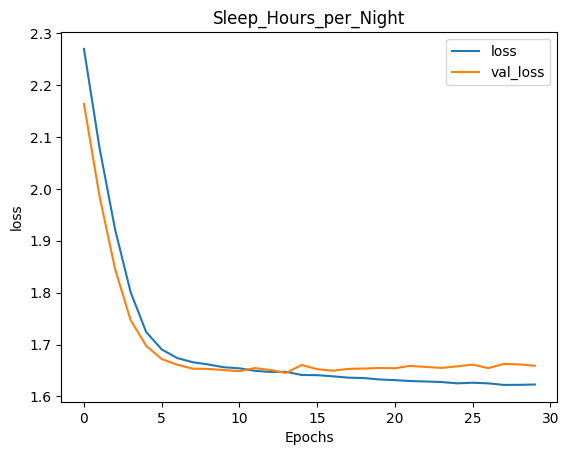

In [324]:
display_history(history, ['loss', 'val_loss'], label_to_drop)

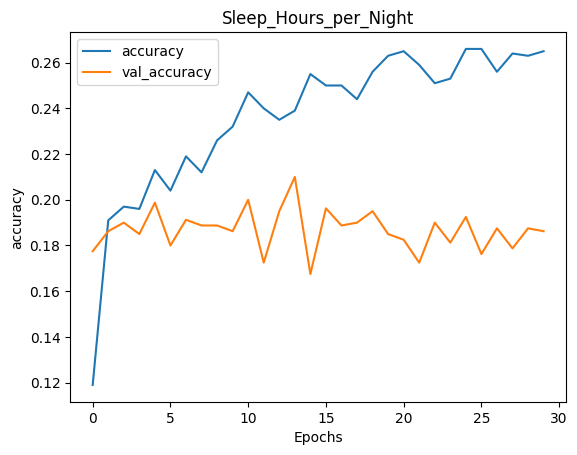

In [325]:
display_history(history, ['accuracy', 'val_accuracy'], label_to_drop)

## CHECK ON TESTS

In [326]:
model.evaluate(test_set_x, test_set_y)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Top2: 0.3965 - accuracy: 0.2037 - loss: 1.6607


[1.6603100299835205, 0.20374999940395355, 0.40031251311302185]

## SOLO TEST

In [327]:
test_set_x[0], test_set_y[0], test_set_x[-1], test_set_y[-1]

(array([1.        , 0.875     , 0.66666667, 0.8729    , 0.75327533,
        0.67263453, 0.92059206, 0.79177918, 0.498     , 0.8161    ,
        0.68416842, 0.44666667, 0.        , 1.        , 0.1       ]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([1.        , 0.83333333, 1.        , 0.9533    , 0.9219922 ,
        0.47159432, 0.73447345, 0.6279628 , 0.584     , 0.8834    ,
        0.91259126, 0.52333333, 0.        , 0.        , 1.        ]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]))

In [328]:
model.predict(np.atleast_2d(test_set_x[0])), model.predict(np.atleast_2d(test_set_x[-1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


(array([[6.1098550e-04, 1.6849021e-04, 3.9310523e-04, 5.4728589e-04,
         1.9075185e-01, 1.7380145e-01, 1.9173002e-01, 2.2864851e-01,
         1.9996645e-01, 1.3381891e-02]], dtype=float32),
 array([[2.0717936e-04, 5.0352723e-05, 1.4390812e-04, 1.4613115e-04,
         1.3804959e-01, 1.9350514e-01, 2.3959039e-01, 2.2288488e-01,
         1.9863313e-01, 6.7893290e-03]], dtype=float32))

In [329]:
def predict(model):
    history = model.fit(x=train_set_x, y=train_set_y, batch_size=128, epochs=30, validation_data=(valid_set_x, valid_set_y))
    display_history(history, ['loss', 'val_loss'], label_to_drop)
    display_history(history, ['accuracy', 'val_accuracy'], label_to_drop)
    model.evaluate(test_set_x, test_set_y)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - Top2: 0.2530 - accuracy: 0.1278 - loss: 2.2149 - val_Top2: 0.3762 - val_accuracy: 0.1900 - val_loss: 1.8851
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - Top2: 0.4044 - accuracy: 0.2018 - loss: 1.8241 - val_Top2: 0.4125 - val_accuracy: 0.1988 - val_loss: 1.6533
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - Top2: 0.3683 - accuracy: 0.1784 - loss: 1.6833 - val_Top2: 0.3938 - val_accuracy: 0.1950 - val_loss: 1.6469
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - Top2: 0.4049 - accuracy: 0.2124 - loss: 1.6800 - val_Top2: 0.3925 - val_accuracy: 0.1813 - val_loss: 1.6383
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - Top2: 0.4052 - accuracy: 0.2161 - loss: 1.6883 - val_Top2: 0.4087 - val_accuracy: 0.1975 - val_loss: 1.6407
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - Top2: 0.4219 - accuracy: 0.2131 - loss: 1.6571 - val_Top2: 0.3875 - val_accuracy: 0.1975 - val_loss: 1.6429
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/st

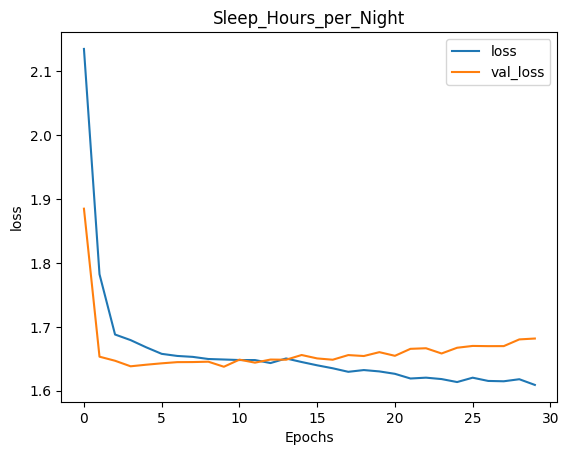

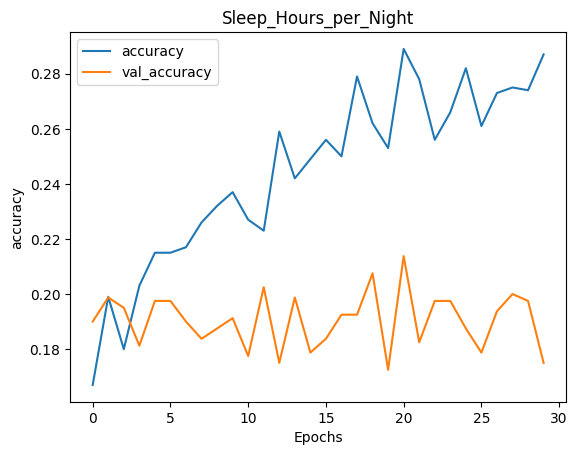

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Top2: 0.3918 - accuracy: 0.2047 - loss: 1.6815


In [330]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_set_x.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(train_set_y.shape[1], activation='softmax' if train_set_y.shape[1] > 2 else 'sigmoid'))  # output layer

model.compile(optimizer=Adam(learning_rate=0.001),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy', TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - Top2: 0.2193 - accuracy: 0.1945 - loss: 2.2888 - val_Top2: 0.3137 - val_accuracy: 0.1825 - val_loss: 2.1412
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - Top2: 0.3343 - accuracy: 0.2002 - loss: 2.1155 - val_Top2: 0.3850 - val_accuracy: 0.1825 - val_loss: 2.0136
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - Top2: 0.3981 - accuracy: 0.1790 - loss: 2.0051 - val_Top2: 0.3925 - val_accuracy: 0.1825 - val_loss: 1.9193
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - Top2: 0.3944 - accuracy: 0.1921 - loss: 1.9134 - val_Top2: 0.3975 - val_accuracy: 0.1988 - val_loss: 1.8488
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - Top2: 0.4028 - accuracy: 0.2064 - loss: 1.8481 - val_Top2: 0.3887 - val_accuracy: 0.1988 - val_loss: 1.7936
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - Top2: 0.4064 - accuracy: 0.2085 - loss: 1.7765 - val_Top2: 0.3988 - val_accuracy: 0.1925 - val_loss: 1.7515
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/st

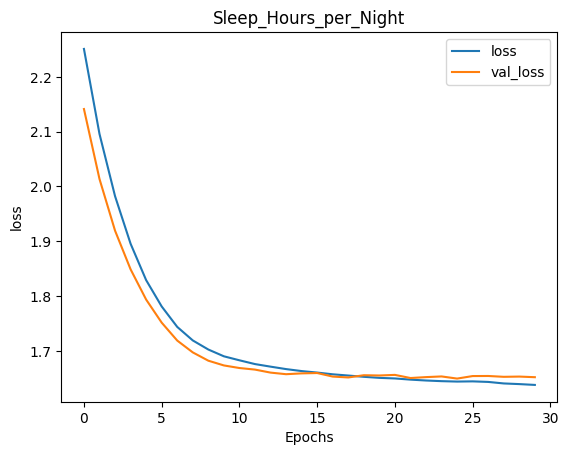

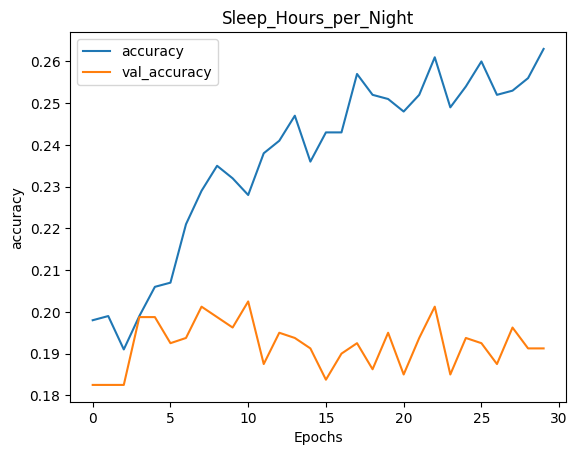

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Top2: 0.4206 - accuracy: 0.2100 - loss: 1.6513


In [332]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_set_x.shape[1],)))
model.add(Dense(train_set_y.shape[1], activation='softmax' if train_set_y.shape[1] > 2 else 'sigmoid'))  # output layer

model.compile(optimizer=Adam(learning_rate=0.001),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy', TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model)

In [331]:
raise BaseException("stop")

BaseException: stop

## BELOW IS FROM EXAMPLES

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

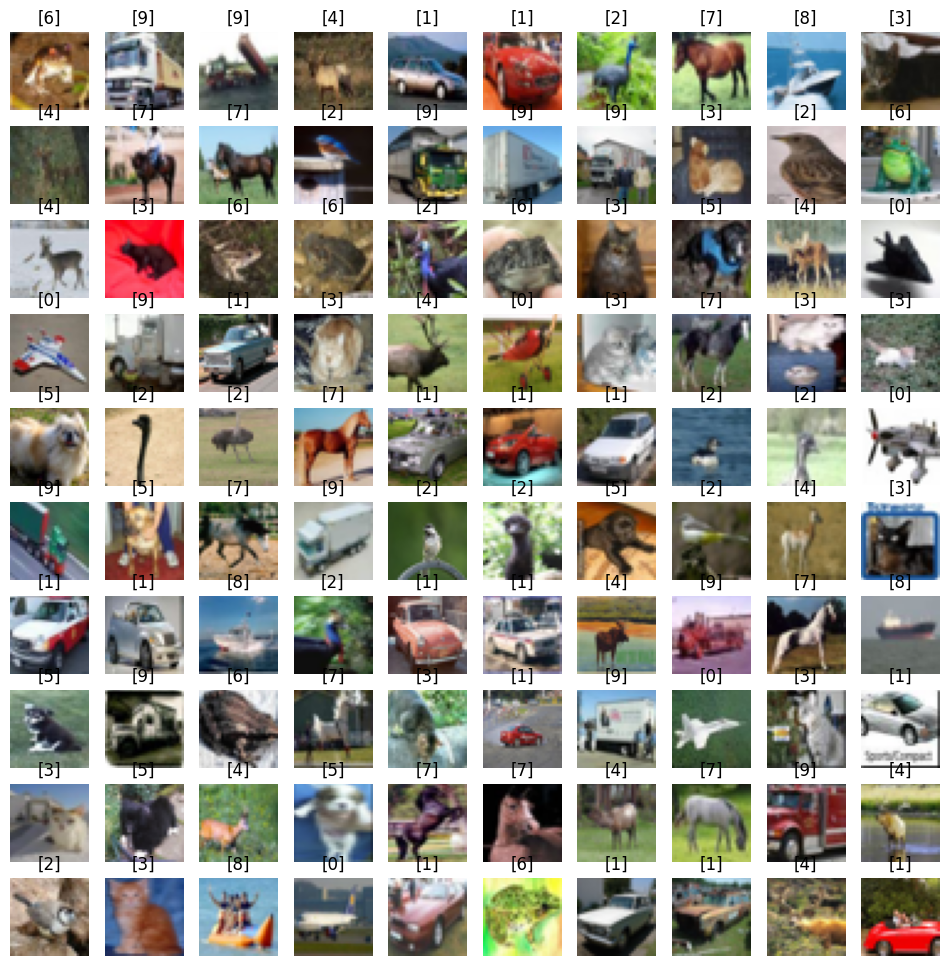

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(100):
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(np.array(x_train[i]))
    plt.title(str(y_train[i]))
    plt.axis("off")

# The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. 

In [ ]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
x_train[0]

array([[[ 59.,  62.,  63.],
        [ 43.,  46.,  45.],
        [ 50.,  48.,  43.],
        ...,
        [158., 132., 108.],
        [152., 125., 102.],
        [148., 124., 103.]],

       [[ 16.,  20.,  20.],
        [  0.,   0.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [123.,  88.,  55.],
        [119.,  83.,  50.],
        [122.,  87.,  57.]],

       [[ 25.,  24.,  21.],
        [ 16.,   7.,   0.],
        [ 49.,  27.,   8.],
        ...,
        [118.,  84.,  50.],
        [120.,  84.,  50.],
        [109.,  73.,  42.]],

       ...,

       [[208., 170.,  96.],
        [201., 153.,  34.],
        [198., 161.,  26.],
        ...,
        [160., 133.,  70.],
        [ 56.,  31.,   7.],
        [ 53.,  34.,  20.]],

       [[180., 139.,  96.],
        [173., 123.,  42.],
        [186., 144.,  30.],
        ...,
        [184., 148.,  94.],
        [ 97.,  62.,  34.],
        [ 83.,  53.,  34.]],

       [[177., 144., 116.],
        [168., 129.,  94.],
        [179., 1

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [ ]:
x_train.min(), x_train.max()

(np.float32(0.0), np.float32(1.0))

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_train_cat = to_categorical(y_train)

In [ ]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [ ]:
y_test_cat = to_categorical(y_test)
y_test_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
x_valid = x_train[40000:]
y_valid_cat = y_train_cat[40000:]

x_train = x_train[:40000]
y_train_cat = y_train_cat[:40000]

In [ ]:
x_valid.shape, y_valid_cat.shape, x_train.shape, x_test.shape

((10000, 32, 32, 3), (10000, 10), (40000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
model = Sequential()
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
#model.add(Activation("relu"))
model.add(MaxPooling2D(4, 4))

#model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(2, 2))
#model.add(Dropout(0.25))

#model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#model.add(BatchNormalization())

#model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(2, 2))

# !!! Important to remind 
# sigmoid - from 0 to 1 (for 2 classes)
# softmax - from 0 to 1 (for 3 or more classes)

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.summary()
#plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,053,450 (4.02 MB)

 Trainable params: 1,053,322 (4.02 MB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy', TopKCategoricalAccuracy(k=2, name="Top2")])

In [ ]:
history = model.fit(x_train, y_train_cat, batch_size=128, epochs = 20, validation_data=(x_valid, y_valid_cat))

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 48s 149ms/step - Top2: 0.5292 - accuracy: 0.3337 - loss: 1.9452 - val_Top2: 0.6878 - val_accuracy: 0.4808 - val_loss: 1.7875
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 148ms/step - Top2: 0.7210 - accuracy: 0.5133 - loss: 1.3535 - val_Top2: 0.7641 - val_accuracy: 0.5770 - val_loss: 1.2486
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 133ms/step - Top2: 0.7662 - accuracy: 0.5701 - loss: 1.2099 - val_Top2: 0.7759 - val_accuracy: 0.5902 - val_loss: 1.1554
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 138ms/step - Top2: 0.7939 - accuracy: 0.6067 - loss: 1.1140 - val_Top2: 0.7880 - val_accuracy: 0.6112 - val_loss: 1.1107
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 144ms/step - Top2: 0.8149 - accuracy: 0.6324 - loss: 1.0378 - val_Top2: 0.8046 - val_accuracy: 0.6251 - val_loss: 1.0595
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 142ms/step - Top2: 0.8265 - accuracy: 0.6463 - loss: 0.9960 - val_Top2: 0.8100 - val_accuracy: 0.6450 - val_loss: 1.0336
Epoch 7/20

In [ ]:
model.save("cifar10.keras")

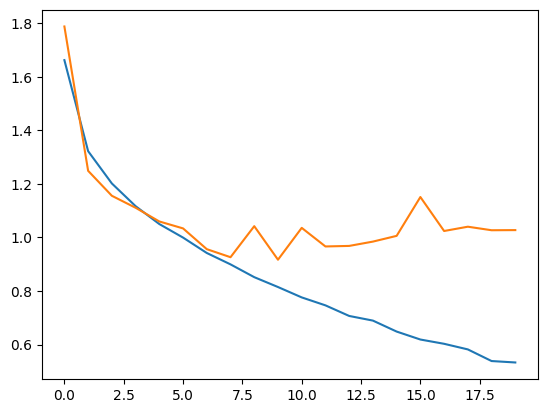

In [ ]:
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);

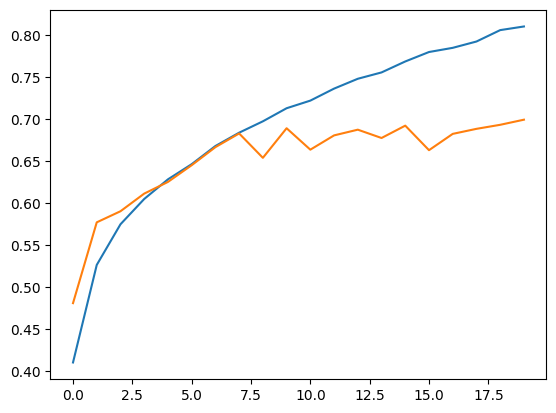

In [ ]:
plt.plot(history.history['accuracy']);
plt.plot(history.history['val_accuracy']);

In [ ]:
model.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - Top2: 0.8442 - accuracy: 0.6880 - loss: 1.0497


[1.0453522205352783, 0.6909999847412109, 0.8442000150680542]

In [ ]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [ ]:
# Predict   
y_prediction_cat = model.predict(x_test)
y_prediction = np.argmax(y_prediction_cat, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [ ]:
print(y_test.shape)
print(y_prediction_cat.shape)

(10000, 1)
(10000, 10)


In [ ]:
#Create confusion matrix and normalizes it over predicted (columns)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prediction, normalize='pred')
print(cm)

[[0.67778753 0.02290076 0.04071247 0.01866978 0.01256281 0.00319489
  0.01036866 0.00815956 0.07450628 0.03886555]
 [0.02458297 0.77003817 0.01017812 0.00700117 0.00167504 0.00532481
  0.00576037 0.00453309 0.04039497 0.09348739]
 [0.07111501 0.01145038 0.65776081 0.06184364 0.09966499 0.07774228
  0.05990783 0.04895739 0.02603232 0.0105042 ]
 [0.03511853 0.01812977 0.08778626 0.53325554 0.08375209 0.17784878
  0.05529954 0.0444243  0.02513465 0.02415966]
 [0.03072871 0.0028626  0.05089059 0.05950992 0.60552764 0.03088392
  0.02995392 0.07252947 0.01166966 0.        ]
 [0.02633889 0.00381679 0.06361323 0.17386231 0.06281407 0.60915868
  0.01382488 0.07252947 0.01436266 0.01260504]
 [0.01229148 0.01145038 0.043257   0.0991832  0.07453936 0.03407881
  0.80875576 0.01450589 0.00987433 0.0052521 ]
 [0.02107112 0.00381679 0.03053435 0.03267211 0.05025126 0.05111821
  0.00460829 0.70897552 0.00807899 0.01785714]
 [0.05531168 0.03625954 0.01017812 0.00583431 0.0041876  0.00425985
  0.00691244

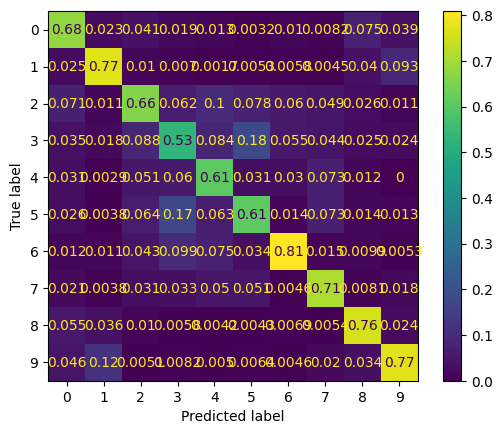

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
print(predictions.shape)
print(predictions[0])

(10000, 10)
[1.5478691e-01 1.4401189e-03 4.0066112e-03 1.6622560e-01 3.8092870e-03
 7.2666851e-04 3.2860896e-04 8.5976458e-04 6.3074636e-01 3.7070047e-02]


In [ ]:
np.argmax(predictions[0])

np.int64(8)

In [ ]:
np.argmax(y_test[0])

np.int64(0)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

Text(0.5, 1.0, 'Class: [3]')

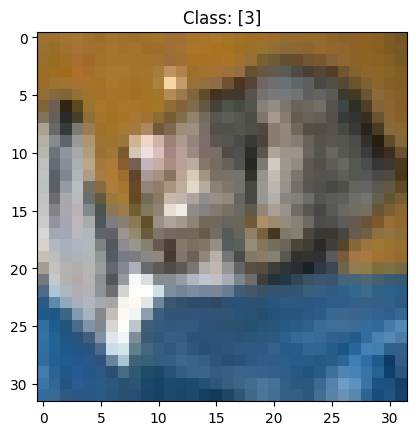

In [ ]:
plt.imshow(x_test[0])
plt.title('Class: ' + str(y_test[0]))